In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd drive/MyDrive/Data/

[Errno 2] No such file or directory: 'drive/MyDrive/Data/'
/content/drive/MyDrive/Data


In [ ]:
!pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree,svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve,auc,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
#hotelbookingdemand
df=pd.read_csv('hotel_bookings.csv')

In [ ]:
print(df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1       

In [ ]:
duplicate = df[df.duplicated()]
duplicate

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [ ]:
df=pd.DataFrame.drop_duplicates(df)

In [ ]:
df=df.fillna(0)

In [ ]:
df['children']=df['children'].astype('int')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
df.drop('agent', axis=1, inplace=True)
df.drop('company', axis=1, inplace=True)

In [ ]:
df['is_canceled'].value_counts()

0    63371
1    24025
Name: is_canceled, dtype: int64

In [ ]:
df['is_canceled'].describe()

count    87396.000000
mean         0.274898
std          0.446466
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_canceled, dtype: float64

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
one_hot_data = pd.get_dummies(df[['hotel','is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled','booking_changes','days_in_waiting_list','total_of_special_requests','reservation_status','is_canceled']])
one_hot_data

,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,total_of_special_requests,is_canceled,hotel_City Hotel,hotel_Resort Hotel,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,0,0,3,0,0,0,0,1,0,1,0
1,0,0,0,4,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,0,0,0,0,0,1,0,0,1,0
119386,0,0,0,0,0,2,0,1,0,0,1,0
119387,0,0,0,0,0,4,0,1,0,0,1,0
119388,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
one_hot_data = pd.get_dummies(df[['hotel','is_repeated_guest', 'previous_cancellations','booking_changes','days_in_waiting_list','total_of_special_requests','reservation_status','is_canceled']],drop_first=True)
one_hot_data

,is_repeated_guest,previous_cancellations,booking_changes,days_in_waiting_list,total_of_special_requests,is_canceled,hotel_Resort Hotel,reservation_status_Check-Out,reservation_status_No-Show
0,0,0,3,0,0,0,1,1,0
1,0,0,4,0,0,0,1,1,0
2,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,1,1,0
4,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...
119385,0,0,0,0,0,0,0,1,0
119386,0,0,0,0,2,0,0,1,0
119387,0,0,0,0,4,0,0,1,0
119388,0,0,0,0,0,0,0,1,0


In [ ]:
one_hot_data.columns

Index(['is_repeated_guest', 'previous_cancellations', 'booking_changes',
       'days_in_waiting_list', 'total_of_special_requests', 'is_canceled',
       'hotel_Resort Hotel', 'reservation_status_Check-Out',
       'reservation_status_No-Show'],
      dtype='object')

In [ ]:
train, test = train_test_split(one_hot_data, test_size =0.1)

In [ ]:
features = ['is_repeated_guest', 'previous_cancellations','booking_changes','days_in_waiting_list','total_of_special_requests'
       ]

In [ ]:
X_train = train[features]
y_train = train['is_canceled']

X_test = test[features]
y_test = test['is_canceled']

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
search_param_for_decision_tree = {
  "criterion":['gini','entropy'],
  "min_samples_split" : range(2,100),  
} 

In [ ]:
grid1 = GridSearchCV(dtree,search_param_for_decision_tree, cv = 5) 
grid1.fit (X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [ ]:
print(f'Grid1 {grid1.best_params_, grid1.best_score_}')


Grid1 ({'criterion': 'gini', 'min_samples_split': 51}, 0.7368287062055885)


In [ ]:
dtree_temp1 =  DecisionTreeClassifier(criterion='gini', min_samples_split=14)

In [ ]:
dtree_temp1_fit = dtree_temp1.fit(X_train, y_train)
dtree_temp1_train_predict = dtree_temp1.predict(X_train)
 
dtree_temp1_train_predict_score = accuracy_score(y_train, dtree_temp1_train_predict) *100
dtree_temp1_train_predict_score

73.76805329536208

In [ ]:
dtree_temp2_test_predict = dtree_temp1.predict(X_test)
dtree_temp2_test_predict_score = accuracy_score(y_test, dtree_temp2_test_predict) *100
dtree_temp2_test_predict_score

72.94050343249427

In [ ]:
print(classification_report(y_test, dtree_temp2_test_predict))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84      6279
           1       0.89      0.04      0.09      2461

    accuracy                           0.73      8740
   macro avg       0.81      0.52      0.46      8740
weighted avg       0.77      0.73      0.63      8740



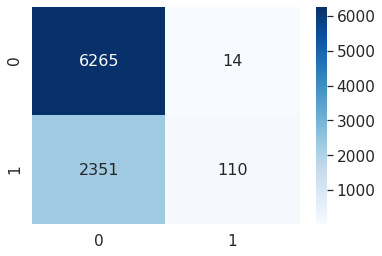

In [ ]:
cm3 = confusion_matrix(y_test, dtree_temp2_test_predict)
df_cm3 = pd.DataFrame(cm3, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

In [ ]:
#from sklearn import svm

In [ ]:
#svmf = svm.SVC(C=10000000, kernel='rbf', degree=3)

In [ ]:
#model_svm = svmf.fit(X_train, y_train)

In [ ]:
#pred_svm = model_svm.predict(X_test)

In [ ]:
#test_score_svm = accuracy_score(Y_test, pred_svm)*100
#test_score_svm

In [ ]:
train, test = train_test_split(one_hot_data, test_size =0.25)

In [ ]:
train.shape

(65547, 9)

In [ ]:
test.shape

(21849, 9)

In [ ]:
c1 = DecisionTreeClassifier(min_samples_split=10)

In [ ]:
features = ['is_repeated_guest', 'previous_cancellations','booking_changes','days_in_waiting_list','total_of_special_requests'
      ]

In [ ]:
X_train = train[features]
y_train = train['is_canceled']

X_test = test[features]
y_test = test['is_canceled']

In [ ]:
tree1 = c1.fit(X_train, y_train)

In [ ]:
y_pred_t1 = c1.predict(X_train)

In [ ]:
y_pred1 = c1.predict(X_test)

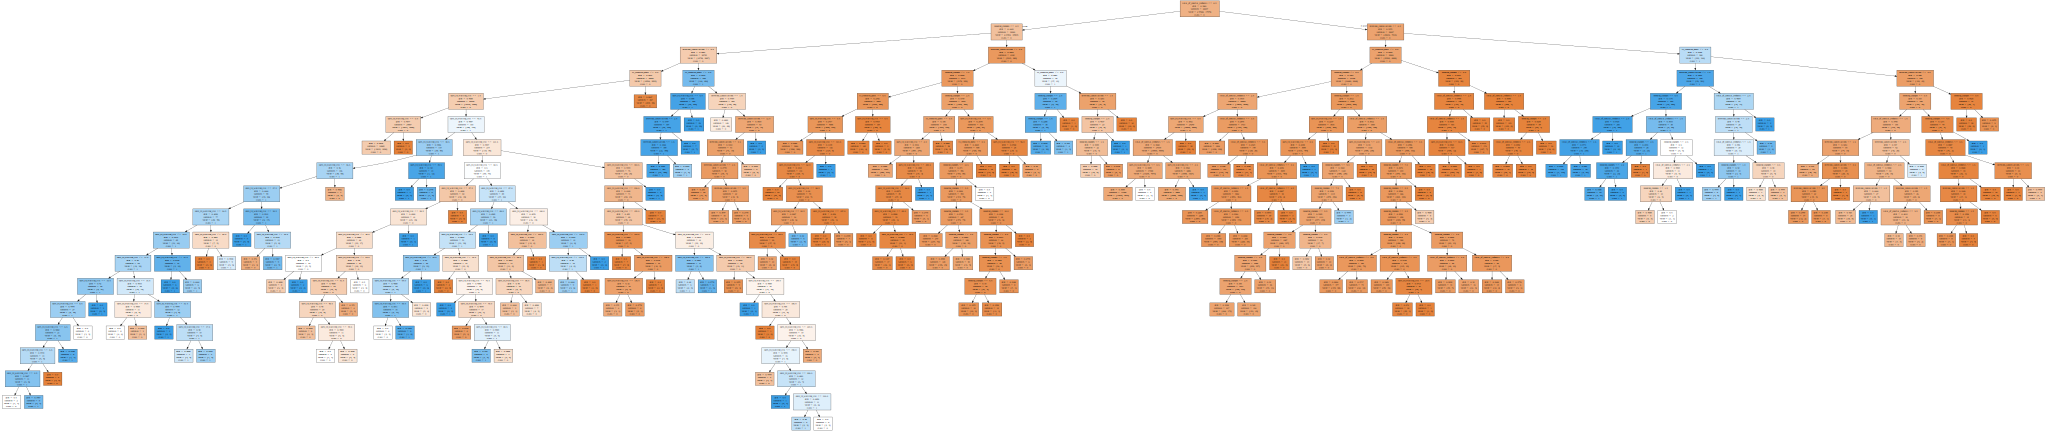

In [ ]:
dot_data = tree.export_graphviz(tree1,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
sat_train_score_1 = accuracy_score(y_train, y_pred_t1)*100

In [ ]:
sat_test_score_1 = accuracy_score(y_test, y_pred1)*100
sat_test_score_1

73.3580484232688

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84     15803
           1       0.89      0.04      0.08      6046

    accuracy                           0.73     21849
   macro avg       0.81      0.52      0.46     21849
weighted avg       0.78      0.73      0.63     21849



In [ ]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[15772,    31],
       [ 5790,   256]])

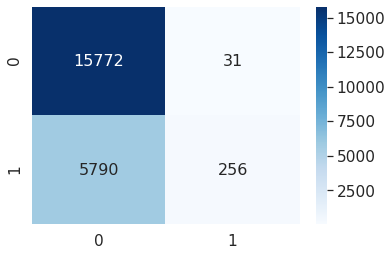

In [ ]:
df_cm1 = pd.DataFrame(cm1, range(2), range(2))
sns.set(font_scale=1.4) 
sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()